In [2]:
import pandas


dataset = pandas.read_csv('data/dataset_positivas_Quellon')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset

,id_news,country,media_outlet,url,title,text,date,title_label,title_score
0,21397413.0,chile,elinsular,https://elinsular.cl/noticias/chiloe/2021/03/2...,Hospital de Quellón recibe importante donación,En medio de la emergencia sanitaria provocada ...,2021-03-19,POS,0.978722
1,21389031.0,chile,radioacogida,https://radioacogida.cl/autoridades-visitan-ob...,Autoridades visitan obras concluidas de Edific...,Un completo recorrido por dependencias del Edi...,2021-03-30,POS,0.760330
2,21389374.0,chile,radiopudeto,http://www.pudeto.cl/?p=54078,IV Simposio Nacional de Esculturas en Castro p...,Desde el 01 al 09 de marzo se llevará a cabo e...,2021-03-04,POS,0.772454
3,22412968.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Destacan a los artesanos en su día internacional,"María Báez, Margarita Cáceres, Uberlinda Calbu...",2021-03-20,POS,0.997125


In [3]:
from pandasql import sqldf 

In [14]:
fecha9Primeros = []
fechaRestantes = []
fechasOrdenadas = []
for i in range(1, 32):
    if (i < 10):
        # fecha = fecha+str(i)
        # print(fecha)
        result = sqldf(
            "SELECT * from dataset WHERE date == '2021-03-0"+str(i)+"'  ")
        if result.shape[0]!=0:
            fecha9Primeros.append(result.shape[0])
            fechasOrdenadas.append('2021-03-0'+str(i))
    else:
        result = sqldf(
            "SELECT * from dataset WHERE date == '2021-03-"+str(i)+"'  ")
        if result.shape[0] !=0:
            fechaRestantes.append(result.shape[0])
            fechasOrdenadas.append('2021-03-'+str(i))

In [16]:
fechaPositivas = fecha9Primeros+fechaRestantes
fechaPositivas
print(fechasOrdenadas)

['2021-03-04', '2021-03-19', '2021-03-20', '2021-03-30']


In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook


<IPython.core.display.Javascript object>


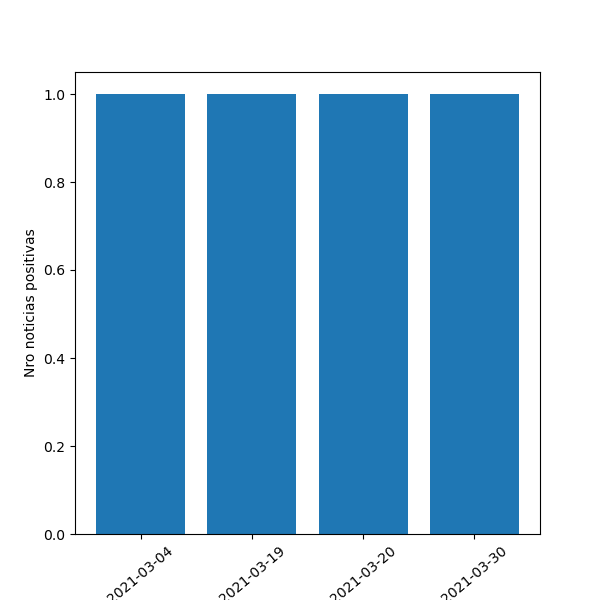

In [26]:
plt.figure(figsize=(6, 6))
plt.bar(fechasOrdenadas, fechaPositivas)
plt.xlabel('Fecha')
plt.ylabel('Nro noticias positivas')
plt.xticks(rotation=40)
plt.show()
plt.savefig('DistibucionNoticiasPositivasMarzoQuellon.png')